In [1]:
import pandas as pd
import numpy as np

In [2]:
% matplotlib inline
import matplotlib.pyplot as plt

### 导入原始数据

In [3]:
df_30_o = pd.read_csv('m30.csv')

In [4]:
df_30_o.head()

,date,open,close,high,low,volume,code
0,2017-12-21 14:30,10.13,10.13,10.14,10.12,6272.0,600838
1,2017-12-21 15:00,10.13,10.12,10.16,10.11,11846.0,600838
2,2017-12-22 10:00,10.08,10.11,10.12,10.06,4886.0,600838
3,2017-12-22 10:30,10.10,10.12,10.16,10.09,3922.0,600838
4,2017-12-22 11:00,10.12,10.08,10.14,10.06,4346.0,600838


### treat Time Index
#### from sql

In [4]:
def tmNorm(dataframe,tmcol):
    dataframe.loc[:,tmcol] = pd.to_datetime(dataframe[tmcol])
    dataframe.set_index(tmcol, inplace=True)
    return dataframe

In [5]:
df_1_o.drop('Tm.1', axis = 1, inplace=True)
df_1_o = tmNorm(df_1_o,'Tm')

In [6]:
df_30_o.drop('Tm.1', axis = 1, inplace=True)
df_30_o = tmNorm(df_30_o,'Tm')

ValueError: labels ['Tm.1'] not contained in axis

In [7]:
df_30_o.head(1)

,O,H,L,C,V,A
Tm,,,,,,
2017-12-01 09:30:00,5.06,5.06,5.02,5.05,7072.0,478655.0


#### from ts

In [5]:
df_30 = df_30_o.copy(True)

In [6]:
df_30_o.head();

In [7]:
df_30.head()

,date,open,close,high,low,volume,code
0,2017-12-21 14:30,10.13,10.13,10.14,10.12,6272.0,600838
1,2017-12-21 15:00,10.13,10.12,10.16,10.11,11846.0,600838
2,2017-12-22 10:00,10.08,10.11,10.12,10.06,4886.0,600838
3,2017-12-22 10:30,10.10,10.12,10.16,10.09,3922.0,600838
4,2017-12-22 11:00,10.12,10.08,10.14,10.06,4346.0,600838


In [8]:
df_30.loc[:,'date'] = pd.to_datetime(df_30['date'])

In [9]:
df_30.set_index('date', inplace=True)

In [10]:
df_30.columns = ['O','C','H','L','V','code']

### add calculated columns

In [11]:
def dfcal(dataframe):
    df = dataframe.copy()
    df.is_copy = False
    df.loc[:,'diff1'] = df.C.diff(1)
    df.loc[:,'drt'] = 0
    df.loc[:,'drtC'] = 0
    df.loc[df['diff1'] > 0,'drtC'] = 1
    df.loc[df['diff1'] < 0,'drtC'] = -1
    df.loc[:,'mono3'] = df.drtC.rolling(3).sum()
    df.loc[:,'diff2'] = df['diff1'].rolling(2).sum()
    df.loc[:,'diff3'] = df['diff1'].rolling(3).sum()
    df.loc[:,'pct1'] = df.C.pct_change().abs()
    df.loc[:,'pct2'] = df.C.pct_change(2).abs()
    df.loc[:,'pct3'] = df.C.pct_change(3).abs()
    df.loc[:,'stdF'] = 0
    return df

In [12]:
df30 = dfcal(df_30)

In [13]:
df30.head(5)

,O,C,H,L,V,code,diff1,drt,drtC,mono3,diff2,diff3,pct1,pct2,pct3,stdF
date,,,,,,,,,,,,,,,,
2017-12-21 14:30:00,10.13,10.13,10.14,10.12,6272.0,600838,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
2017-12-21 15:00:00,10.13,10.12,10.16,10.11,11846.0,600838,-0.01,0,-1,NaN,NaN,NaN,0.000987,NaN,NaN,0
2017-12-22 10:00:00,10.08,10.11,10.12,10.06,4886.0,600838,-0.01,0,-1,-2.0,-0.02,NaN,0.000988,0.001974,NaN,0
2017-12-22 10:30:00,10.10,10.12,10.16,10.09,3922.0,600838,0.01,0,1,-1.0,0.00,-0.01,0.000989,0.000000,0.000987,0
2017-12-22 11:00:00,10.12,10.08,10.14,10.06,4346.0,600838,-0.04,0,-1,-1.0,-0.03,-0.04,0.003953,0.002967,0.003953,0


### Vistualized Analysis

In [14]:
q = [0,.125,.25,.5,.75,.875,1]

In [15]:
TmS = pd.to_datetime('2018-02-9 14:00')
TmE = pd.to_datetime('2018-02-26 14:30')

In [16]:
df_1['diff'].hist()

NameError: name 'df_1' is not defined

In [33]:
df_1['diff'].describe()

count    14531.000000
mean        -0.000020
std          0.011295
min         -0.230000
25%         -0.010000
50%          0.000000
75%          0.000000
max          0.420000
Name: diff, dtype: float64

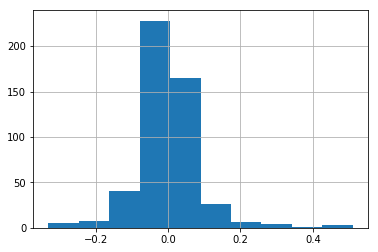

In [41]:
df_30['diff3'].hist()

In [48]:
df_30.diff3.describe(q)

count    486.000000
mean      -0.001955
std        0.086096
min       -0.330000
0%        -0.330000
12.5%     -0.070000
25%       -0.030000
50%        0.000000
75%        0.030000
87.5%      0.060000
100%       0.510000
max        0.510000
Name: diff3, dtype: float64

In [22]:
pd.value_counts(pd.qcut(df_30.C,q))

(4.62, 4.87]                 129
(4.87, 5.08]                 114
(5.08, 5.26]                  67
(4.34, 4.62]                  62
(4.098999999999999, 4.34]     62
(5.26, 6.0]                   55
Name: C, dtype: int64

In [37]:
df30[['pct3','pct2','pct1']].describe(q)

,pct3,pct2,pct1
count,483.000000,484.000000,485.000000
mean,0.010301,0.008310,0.005769
std,0.015312,0.013304,0.010457
min,0.000000,0.000000,0.000000
0%,0.000000,0.000000,0.000000
12.5%,0.001132,0.001039,0.001016
25%,0.002322,0.002138,0.001167
50%,0.005663,0.004497,0.003046
75%,0.010433,0.008310,0.005800
87.5%,0.018640,0.014447,0.009994


In [19]:
q875_thread = df30[['pct1','pct2','pct3']].quantile(0.875).tolist()
q875_thread

[0.009993918530503909, 0.014446876482462567, 0.018639592269729333]

In [39]:
type(q875_thread)

pandas.core.series.Series

In [74]:
df30xx.sort_values('pct3', ascending=False).head()

,O,H,L,C,V,A,diff1,drtC,mono3,diff2,diff3,pct1,pct2,pct3
Tm,,,,,,,,,,,,,,
2018-02-12 09:30:00,4.17,4.24,4.16,4.22,13236.0,287813.0,0.09,1,3.0,0.10,0.12,0.021792,0.024272,0.029268
2018-02-12 10:00:00,4.21,4.27,4.21,4.24,9682.0,205379.0,0.02,1,3.0,0.11,0.12,0.004739,0.026634,0.029126
2018-02-12 10:30:00,4.24,4.26,4.22,4.25,7099.0,19080.0,0.01,1,3.0,0.03,0.12,0.002358,0.007109,0.029056
2018-02-22 10:00:00,4.31,4.35,4.30,4.33,4436.0,48675.0,0.02,1,3.0,0.07,0.08,0.004640,0.016432,0.018824
2018-02-22 10:30:00,4.33,4.34,4.32,4.33,3160.0,105009.0,0.00,0,2.0,0.02,0.07,0.000000,0.004640,0.016432


### Gen DataFrame Index
#### tm_idx_dict /tmstampL, col_idx_dict / colL

In [29]:
# Gen Time Index Dictionary 
tmstampL = df30.index.tolist()
idx = list(range(len(tmstampL)))
tm_idx_dict = dict(zip(tmstampL,idx))

In [30]:
tm_idx_dict[TmS]

279

In [31]:
colL = df30.columns.tolist()
idx = list(range(len(colL)))
col_idx_dict = dict(zip(colL,idx))

In [32]:
col_idx_dict['H']

2

### Search Flag Mode

In [17]:
df30.iloc[10:20]

,O,C,H,L,V,code,diff1,drt,drtC,mono3,diff2,diff3,pct1,pct2,pct3,stdF
date,,,,,,,,,,,,,,,,
2017-12-25 10:00:00,9.83,9.88,9.92,9.82,7285.0,600838,-0.01,0,-1,-3.0,-0.11,-0.13,0.001011,0.011011,0.012987,0
2017-12-25 10:30:00,9.88,9.84,9.89,9.81,5465.0,600838,-0.04,0,-1,-3.0,-0.05,-0.15,0.004049,0.005056,0.015015,0
2017-12-25 11:00:00,9.84,9.85,9.85,9.81,2743.0,600838,0.01,0,1,-1.0,-0.03,-0.04,0.001016,0.003036,0.004044,0
2017-12-25 11:30:00,9.85,9.81,9.85,9.80,3030.0,600838,-0.04,0,-1,-1.0,-0.03,-0.07,0.004061,0.003049,0.007085,0
2017-12-25 13:30:00,9.81,9.83,9.90,9.80,5647.0,600838,0.02,0,1,1.0,-0.02,-0.01,0.002039,0.002030,0.001016,0
2017-12-25 14:00:00,9.83,9.81,9.84,9.79,3058.0,600838,-0.02,0,-1,-1.0,0.00,-0.04,0.002035,0.000000,0.004061,0
2017-12-25 14:30:00,9.82,9.67,9.82,9.66,6819.0,600838,-0.14,0,-1,-1.0,-0.16,-0.14,0.014271,0.016277,0.014271,0
2017-12-25 15:00:00,9.67,9.66,9.69,9.57,8415.0,600838,-0.01,0,-1,-3.0,-0.15,-0.17,0.001034,0.015291,0.017294,0
2017-12-26 10:00:00,9.68,9.81,9.87,9.68,9736.0,600838,0.15,0,1,-1.0,0.14,0.00,0.015528,0.014478,0.000000,0


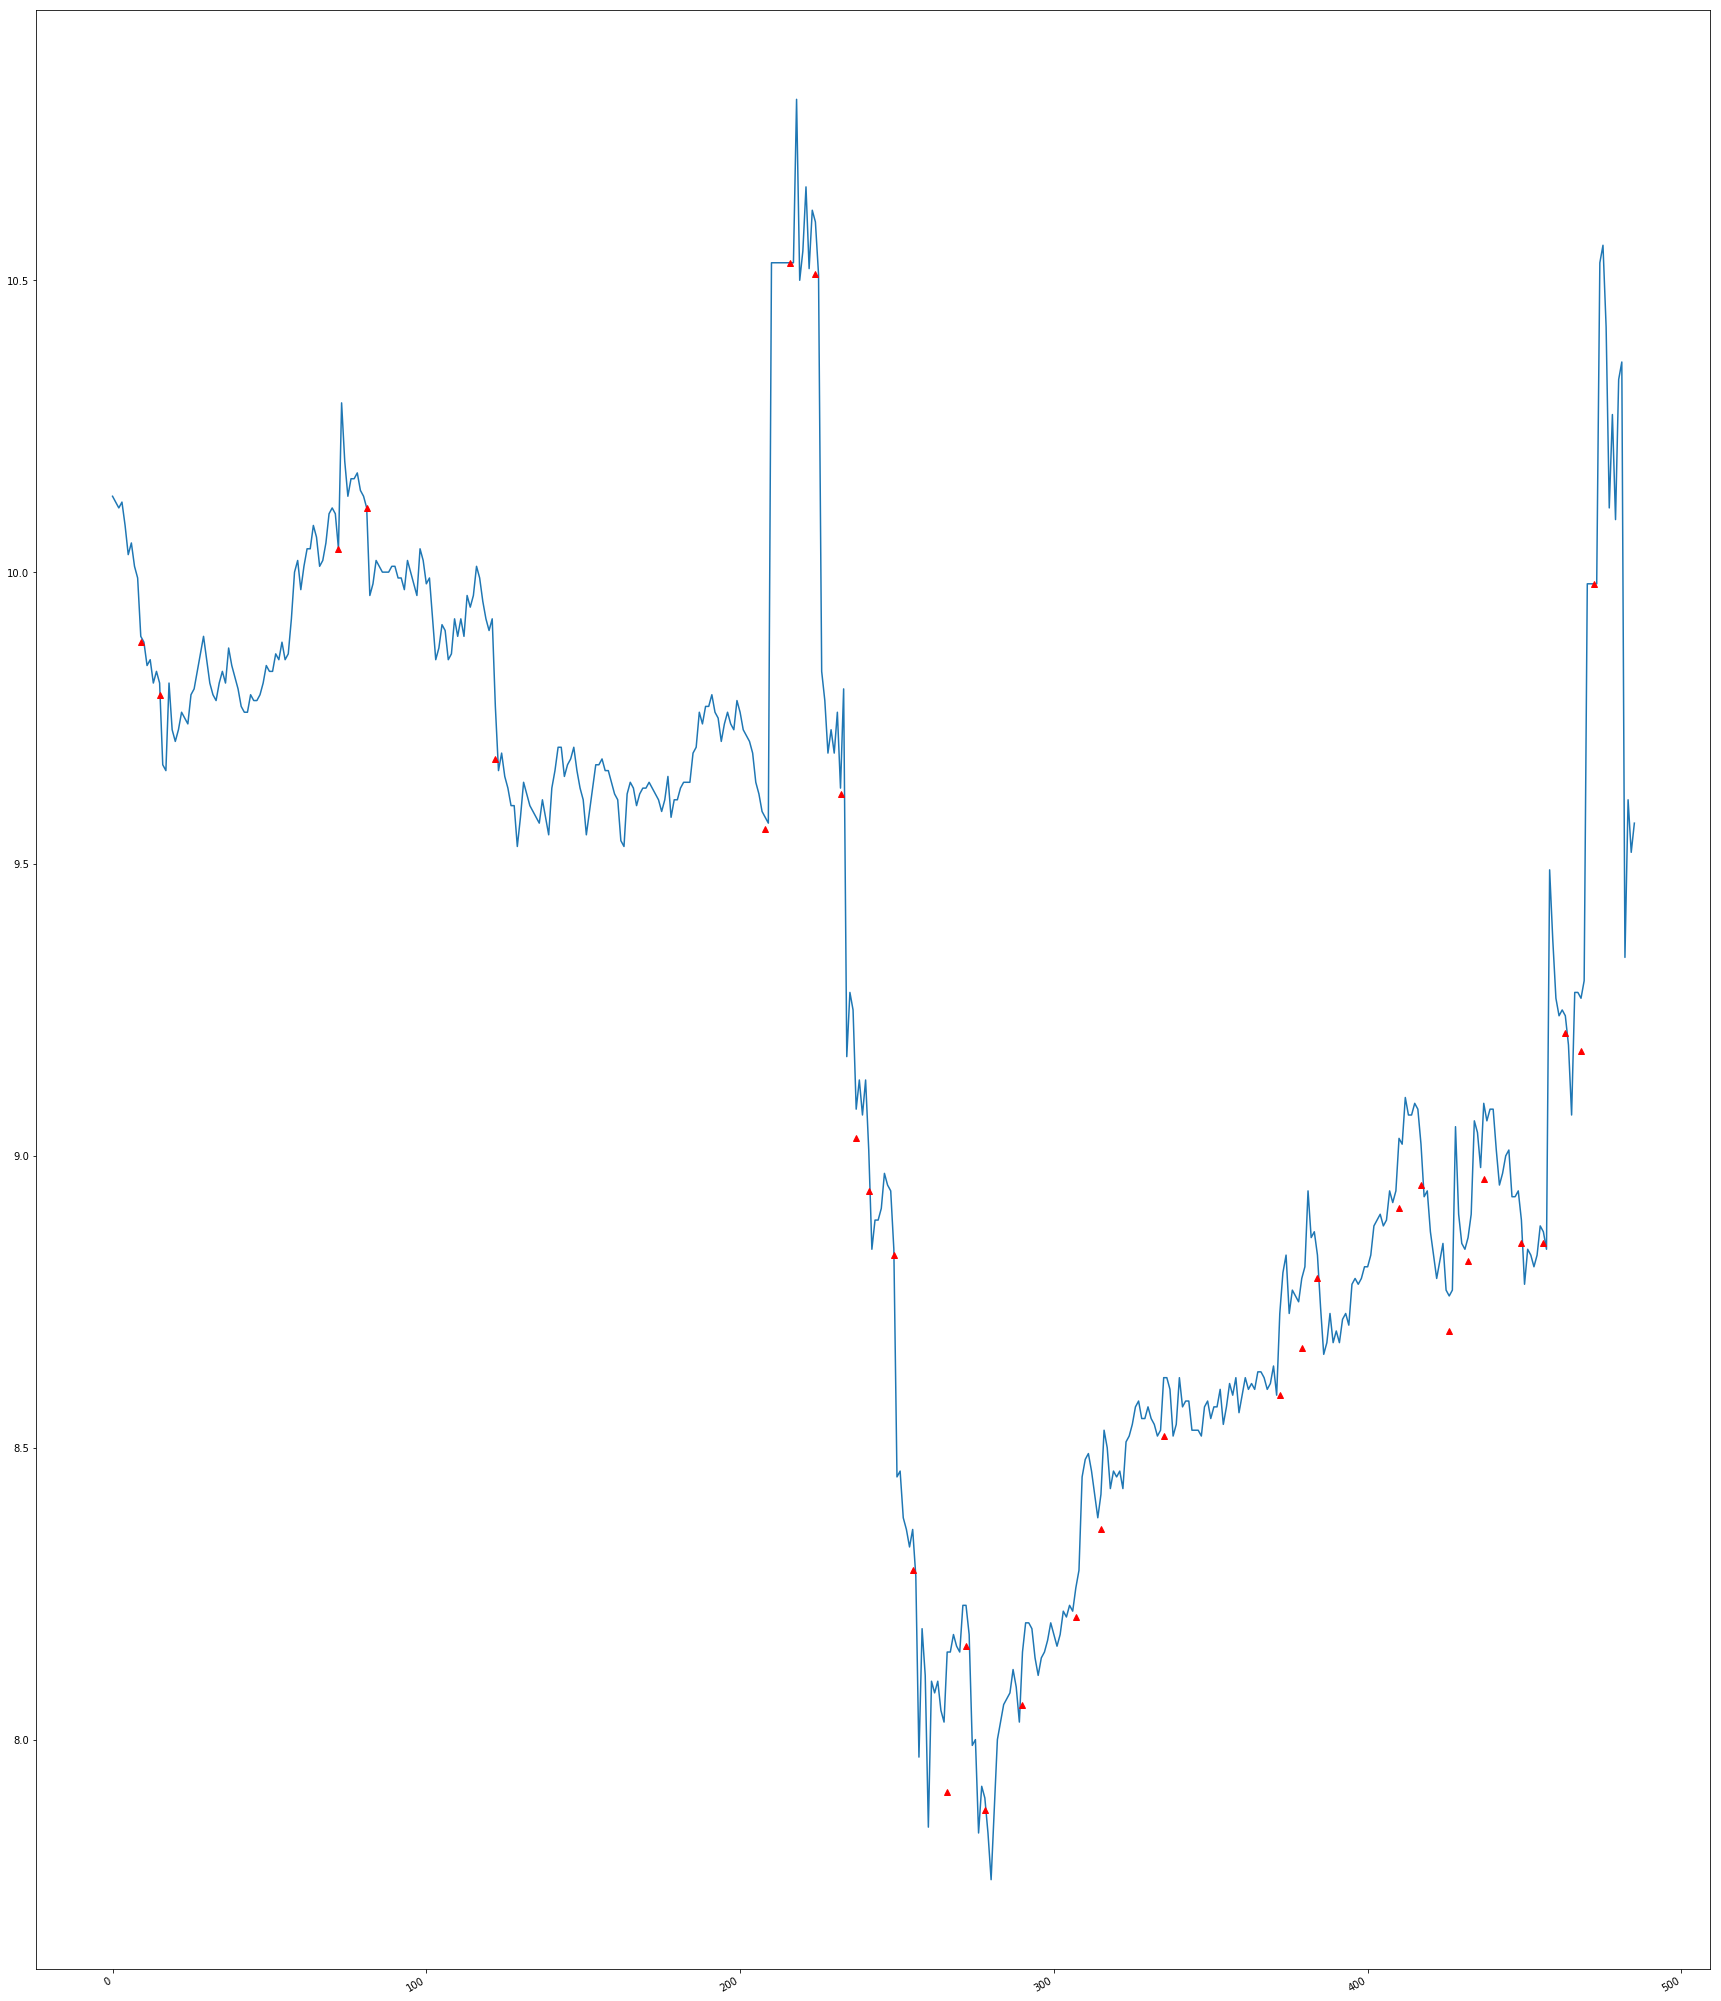

In [50]:
fig = plt.figure('Bar chart & Pie chart')
ax = fig.add_subplot(111)
ax = df30.C.plot(use_index=False,figsize=(30,40))
ax.plot(x,y, 'r^')
plt.savefig("000.png") 

In [20]:
arr30 = df30[['O','C']].values  # numpy.ndarray
arr30[2:5]

array([[10.08, 10.11],
       [10.1 , 10.12],
       [10.12, 10.08]])

In [21]:
i = 4
aa = arr30[i-4:i,0:2]  # 2 x 4
aa

array([[10.13, 10.13],
       [10.13, 10.12],
       [10.08, 10.11],
       [10.1 , 10.12]])

In [22]:
arr30[0,0]

10.13

In [23]:
# Calculate pct by loop
def pct123(ocArr):  # ocArr 2 x 4
    e = ocArr[3,1]
    s1 = ocArr[2,1]
    s2 = ocArr[1,1]
    s3 = ocArr[0,1]
    pct1 = abs((e-s1)/s1)
    pct2 = abs((e-s2)/s2)
    pct3 = abs((e-s3)/s3)
    pct = np.array([pct1,pct2,pct3])
    return pct

In [24]:
p = pct123(aa)  #array([0.00098912, 0.        , 0.00098717])
r = p > q875_thread  # array([False, False, False])
r.sum() > 0 # >> find a stick
peak_position = np.array([-1,-2,-3])*r  #  array([-1,0,0])
pp = peak_position.min()  # get the SHIFT of the start point of a stick


In [25]:
class Stick(object):
    crt_status = 'close'
    
    def __init__(self, startTm, crtTm):
        self.TmS = startTm
        self.TmE = crtTm
        self.TmI = crtTm
        self.drt = 0
        Stick.crt_status = 'open'

    def terminate(self,crtTm=None):
        self.TmE = crtTm
        Stick.crt_status = 'close'
        return True

In [26]:
stL = []
for i in range(len(arr30)):
    '''
    find big move:
    1. GET np.array([pct1,pct2,pct3]). (pct_chagne between 1 or 2 or 3 bars)
    '''
    if i>3:
        arr = arr30[i-4:i,0:2]
        p = pct123(arr)  
        r = p > q875_thread  # array([False, False, False])
        if r.sum() > 0: # >>> find a stick
            if len(stL)==0 or stL[-1].crt_status=='close':
                peak_position = np.array([-1,-2,-3])*r  #  array([-1,0,0])
                stL.append(Stick(i+peak_position.min(),i))
        else:
            if len(stL)>0:
                stL[-1].terminate(i)
            
    if len(stL)>0:
        print(i,p,r,stL[-1].crt_status,len(stL))
            

10 [0.01001001 0.01198801 0.0159204 ] [ True False False] open 1
11 [0.00101112 0.01101101 0.01298701] [False False False] close 1
12 [0.00404858 0.00505561 0.01501502] [False False False] close 1
13 [0.00101626 0.00303644 0.00404449] [False False False] close 1
14 [0.00406091 0.00304878 0.00708502] [False False False] close 1
15 [0.00203874 0.00203046 0.00101626] [False False False] close 1
16 [0.00203459 0.         0.00406091] [False False False] close 1
17 [0.01427115 0.0162767  0.01427115] [ True  True False] open 2
18 [0.00103413 0.01529052 0.017294  ] [False  True False] open 2
19 [0.01552795 0.01447777 0.        ] [ True  True False] open 2
20 [0.00815494 0.00724638 0.00620476] [False False False] close 2
21 [0.0020555  0.01019368 0.00517598] [False False False] close 2
22 [0.00205973 0.         0.00815494] [False False False] close 2
23 [0.00308325 0.00514933 0.00308325] [False False False] close 2
24 [0.00102459 0.0020555  0.00411946] [False False False] close 2
25 [0.00102564

360 [0.00696056 0.00349243 0.0058072 ] [False False False] close 20
361 [0.00350467 0.00348028 0.        ] [False False False] close 20
362 [0.00349243 0.00700935 0.        ] [False False False] close 20
363 [0.00232019 0.00116414 0.0046729 ] [False False False] close 20
364 [0.00116279 0.00116009 0.00232829] [False False False] close 20
365 [0.00116144 0.         0.00232019] [False False False] close 20
366 [0.00348837 0.00232288 0.00348837] [False False False] close 20
367 [0.         0.00348837 0.00232288] [False False False] close 20
368 [0.00115875 0.00115875 0.00232558] [False False False] close 20
369 [0.00232019 0.00347625 0.00347625] [False False False] close 20
370 [0.00116279 0.00116009 0.0023175 ] [False False False] close 20
371 [0.00348432 0.00465116 0.00232019] [False False False] close 20
372 [0.00578704 0.00232288 0.00116279] [False False False] close 20
373 [0.01629802 0.01041667 0.01393728] [ True False False] open 21
374 [0.00801833 0.02444703 0.01851852] [False  Tr

In [28]:
stL[0].TmS

9

In [33]:
tmstampL[9]

Timestamp('2017-12-22 15:00:00')

In [47]:
x,y = list(),list()
arr = df30['L'].values
for st in stL:
    x.append(st.TmS)
    y.append(arr[st.TmS])

In [48]:
y

[9.88,
 9.79,
 10.04,
 10.11,
 9.68,
 9.56,
 10.53,
 10.51,
 9.62,
 9.03,
 8.94,
 8.83,
 8.29,
 7.91,
 8.16,
 7.88,
 8.06,
 8.21,
 8.36,
 8.52,
 8.59,
 8.67,
 8.79,
 8.91,
 8.95,
 8.7,
 8.82,
 8.96,
 8.85,
 8.85,
 9.21,
 9.18,
 9.98]

### Gen stdK

In [19]:
df_30.head()

,O,H,L,C,V,A,diff1,drt,drtC,mono3,diff2,diff3,pct1,pct2,pct3,stdF
Tm,,,,,,,,,,,,,,,,
2017-12-01 09:30:00,5.06,5.06,5.02,5.05,7072.0,478655.0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
2017-12-01 10:00:00,5.05,5.09,5.04,5.08,11382.0,180789.0,0.03,0,1,NaN,NaN,NaN,0.005941,NaN,NaN,0
2017-12-01 10:30:00,5.09,5.09,5.06,5.06,5506.0,45242.0,-0.02,0,-1,0.0,0.01,NaN,-0.003937,0.001980,NaN,0
2017-12-01 11:00:00,5.06,5.07,5.06,5.07,3623.0,162425.0,0.01,0,1,1.0,-0.01,0.02,0.001976,-0.001969,0.003960,0
2017-12-01 13:00:00,5.07,5.07,5.05,5.05,2098.0,51207.0,-0.02,0,-1,-1.0,-0.01,-0.03,-0.003945,-0.001976,-0.005906,0


* df_std = df_30.loc[:,['H','L']] # copy
* df_std = df_30.loc[:,['H','L']].copy() # copy
* df_std['H'] = df_30['H']    # copy
* df_std['L'] = df_30.loc[:,'L']  # copy


In [55]:
df_std = pd.DataFrame()
df_std['H'] = df_30['H']
df_std['L'] = df_30.loc[:,'L']
#df_std = df_std.merge(df_30.loc[:,['H','L']].shift(), how='left',left_index=True, right_index=True,copy=True)
#df_std.iloc[0,[2,3]] = (5.10,5.06)

In [56]:
df_30.head()

,O,H,L,C,V,A,diff1,drt,drtC,mono3,diff2,diff3,pct1,pct2,pct3,stdF
Tm,,,,,,,,,,,,,,,,
2017-12-01 09:30:00,5.06,5.06,5.02,5.05,7072.0,478655.0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
2017-12-01 10:00:00,5.05,5.09,5.04,5.08,11382.0,180789.0,0.03,0,1,NaN,NaN,NaN,0.005941,NaN,NaN,0
2017-12-01 10:30:00,5.09,5.09,5.06,5.06,5506.0,45242.0,-0.02,0,-1,0.0,0.01,NaN,-0.003937,0.001980,NaN,0
2017-12-01 11:00:00,5.06,5.07,5.06,5.07,3623.0,162425.0,0.01,0,1,1.0,-0.01,0.02,0.001976,-0.001969,0.003960,0
2017-12-01 13:00:00,5.07,5.07,5.05,5.05,2098.0,51207.0,-0.02,0,-1,-1.0,-0.01,-0.03,-0.003945,-0.001976,-0.005906,0


In [57]:
df_std.head()

,H,L
Tm,,
2017-12-01 09:30:00,5.06,5.02
2017-12-01 10:00:00,5.09,5.04
2017-12-01 10:30:00,5.09,5.06
2017-12-01 11:00:00,5.07,5.06
2017-12-01 13:00:00,5.07,5.05


In [58]:
df_std.loc[:,'drt'] = 0
df_std.loc[:,'stdF'] = 0

In [59]:
arr_std = df_std.values

In [60]:
def gen_stdk(s1,s2):
    '''
    s[H,L,drt,stdF]
    '''
    if (s1[0] < s2[0]) & (s1[1] < s2[1]):
        s2[2:] = [1,1]
    elif (s1[0] > s2[0]) & (s1[1] > s2[1]):
        s2[2:] = [-1,1]
    else:
        if s1[2] == 1:
            if s1[0] < s2[0]:
                s2 = [s2[0],max(s1[1],s2[1]), 1, 1]
            else:
                s2 = [s1[0],max(s1[1],s2[1]), 1, 0]
        elif s1[2] == -1:
            if s1[1] > s2[1]:
                s2 = [min(s1[0],s2[0]), s2[1], -1, 1]
            else:
                s2 = [min(s1[0],s2[0]), s1[1], -1, 0]
        else:
            s2 = [min(s1[0],s2[0]),max(s1[1],s2[1]), 0, 0]
    return s2

In [61]:
%%time
for i in range(len(arr_std)):
    if i>0:
        arr_std[i] = gen_stdk(arr_std[i-1],arr_std[i])

Wall time: 4 ms


In [63]:
df_std = pd.DataFrame(arr_std,index = df_std.index,columns=df_std.columns)

In [64]:
df_std.head()

,H,L,drt,stdF
Tm,,,,
2017-12-01 09:30:00,5.06,5.02,0.0,0.0
2017-12-01 10:00:00,5.09,5.04,1.0,1.0
2017-12-01 10:30:00,5.09,5.06,1.0,0.0
2017-12-01 11:00:00,5.09,5.06,1.0,0.0
2017-12-01 13:00:00,5.07,5.05,-1.0,1.0


### Get Lv1

In [67]:
df_Lv0 = df_std.copy(True)
df_Lv0['cnt_up'] = 2
df_Lv0['cnt_dn'] = 2
df_Lv0['nflag'] = 0

arr_Lv0 = df_Lv0.values
arr_Lv0[0]

array([5.06, 5.02, 0.  , 0.  , 2.  , 2.  , 0.  ])

In [68]:
df_Lv0.head(1)

,H,L,drt,stdF,cnt_up,cnt_dn,nflag
Tm,,,,,,,
2017-12-01 09:30:00,5.06,5.02,0.0,0.0,2,2,0


* init: 1st mono3 == 3

In [21]:
df_30.loc[df_30.mono1 == 3,'drt'].index.tolist()[0]

Timestamp('2017-12-07 09:30:00')

In [ ]:
def fPeak(arr3):
    if